In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3 as sql
from sqlalchemy import create_engine
import re

# Số lượng user sử dụng mỗi dịch vụ theo ngày/tháng (ngày total, tháng total - avg) (visualize)

In [394]:
# Load file
per_service = pd.read_csv(r"C:\Users\Administrator\Desktop\Ahamove\220614_Product_Analyst\numer_user_per_service_id_from220101_to220331.csv")
per_service.head()

,year,month,day,service_id,number_users
0,2021,1,1,HAN-2H,3
1,2021,1,1,DAD-BIKE,94
2,2021,1,1,DAD-POOL,66
3,2021,1,1,HAN-BIKE,12547
4,2021,1,1,HAN-POOL,4830


In [395]:
# Get only year 2022
per_service = per_service[per_service['year'] == 2022]

# Get service_name bike - pool - express and SGN - HAN
per_service = per_service[per_service['service_id'].str.contains('BIKE|POOL|EXPRESS', regex = True)]
per_service = per_service[per_service['service_id'].str.contains('SGN|HAN', regex = True)]

per_service.head()

,year,month,day,service_id,number_users
105,2022,1,3,HAN-BIKE,17119
106,2022,1,3,HAN-POOL,7911
107,2022,1,3,SGN-BIKE,17383
109,2022,1,3,SGN-POOL,7536
117,2022,1,3,HAN-EXPRESS,2394


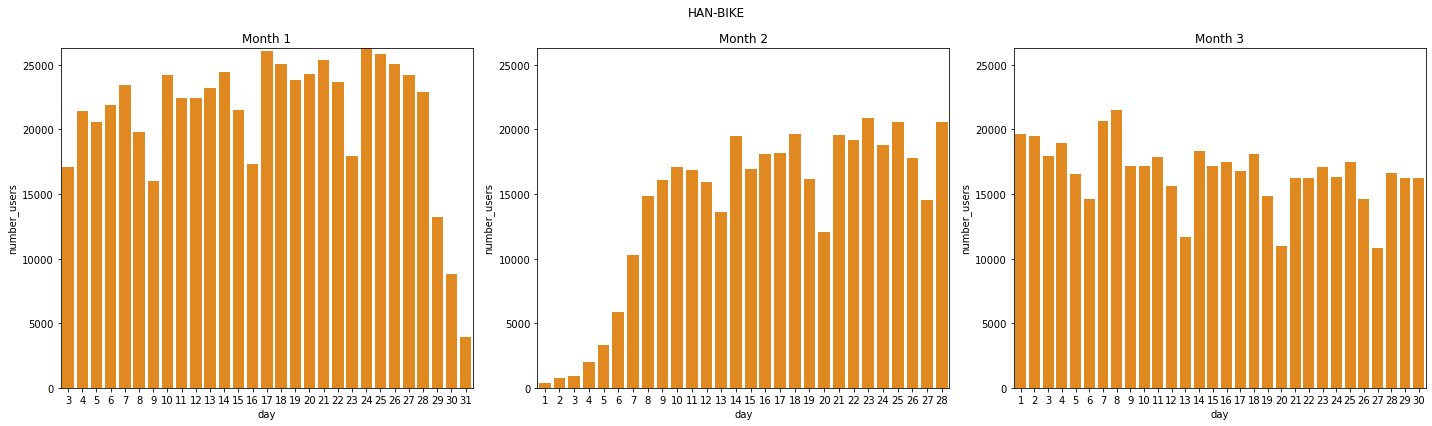

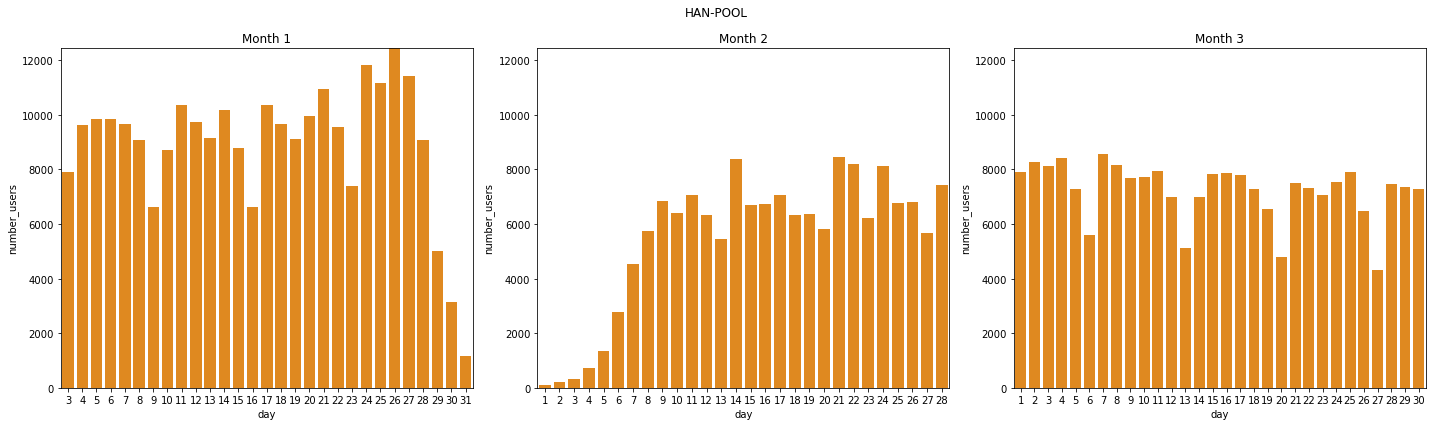

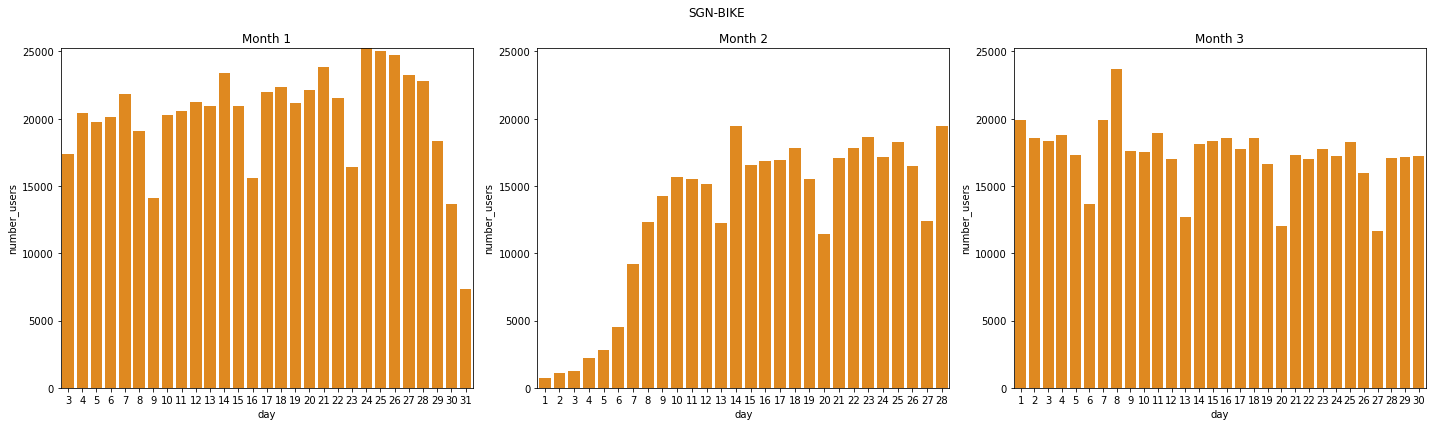

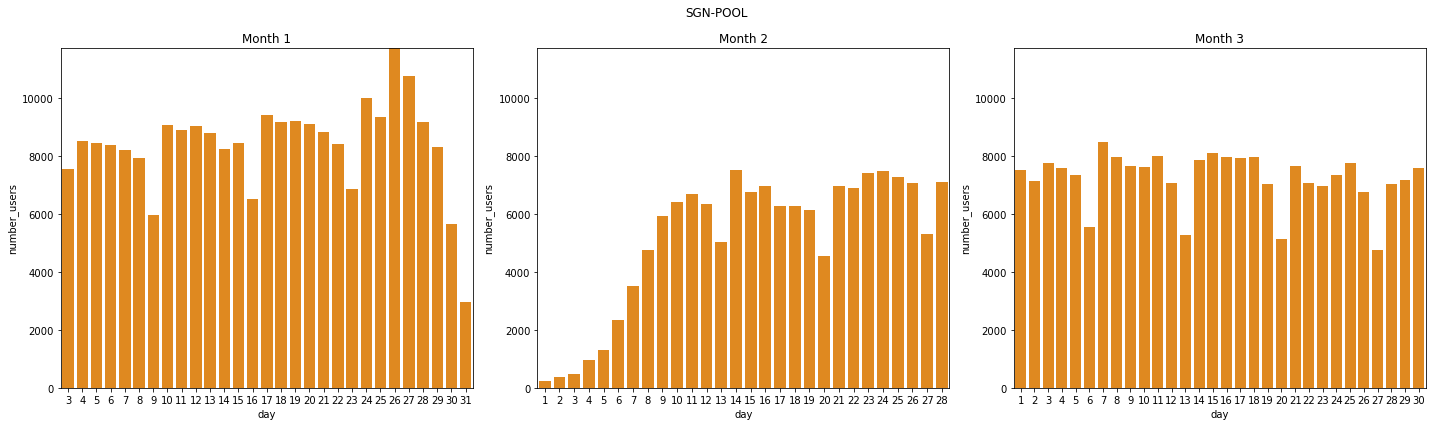

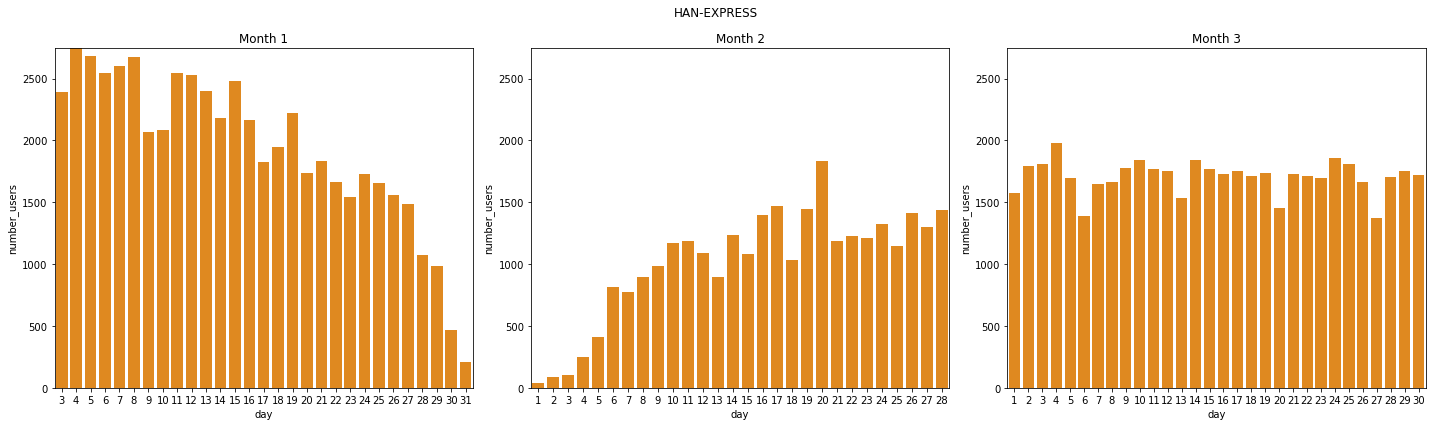

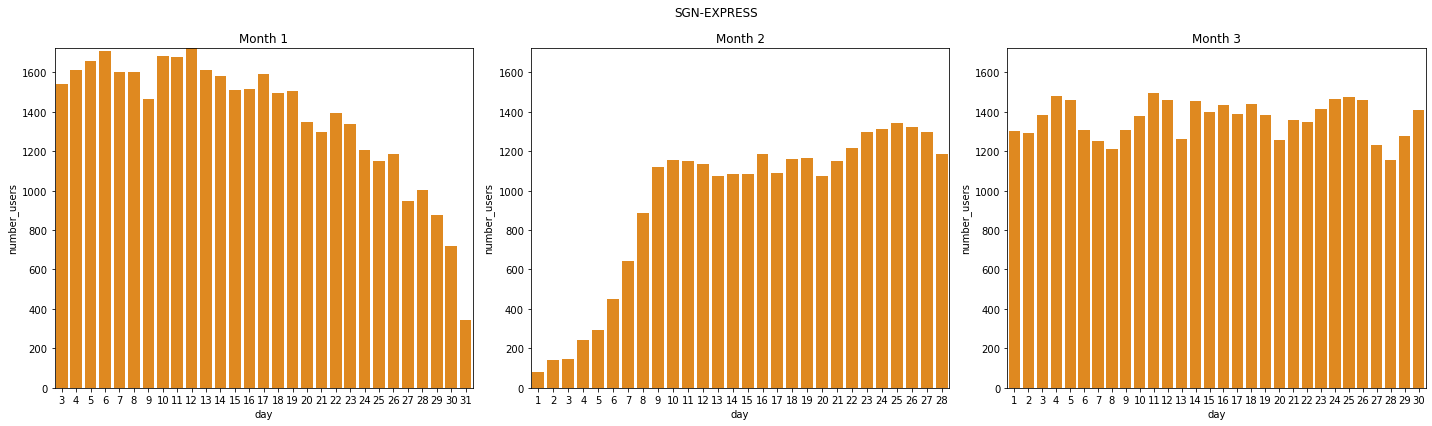

In [390]:
# Day/month 
for ser in per_service['service_id'].unique():
    service = per_service[per_service['service_id'] == ser]
    plt.figure(figsize = (20,6))
    plt.suptitle(ser)
    position = 1
    lim_mx = service.groupby(['month','day'])['number_users'].mean().reset_index()['number_users'].max()
    for month in service['month'].unique():
        plt.subplot(1,3,position)
        sns.barplot(data = service[service['month'] == month].groupby('day')['number_users'].mean().reset_index(),
                     y = 'number_users',
                     x = 'day',
                     color = 'darkorange')
        plt.title("Month " +str(month))
        plt.ylim(0, lim_mx) # for standardize
        position += 1
        plt.tight_layout()
plt.savefig('cau_1b2.png', transparent = True, dpi = 80, bbox_inches = "tight")

# Số lượng đơn hàng (completed và cancelled) ứng với mỗi dịch vụ theo ngày/ tháng (ngày total, tháng total - avg) (tính toán thêm +  visualize)

In [396]:
com_can = pd.read_csv(r"C:\Users\Administrator\Desktop\Ahamove\220614_Product_Analyst\number_completed_and_cancelled_orders_per_service_id_from220101_to220331.csv")
com_can.head()

,year,month,day,service_id,number_completed_orders,number_cancelled_orders
0,2021,1,1,SGN-TMDT,30,9
1,2021,1,1,VCA-POOL,117,16
2,2021,1,1,HAN-SAMEDAY,2561,817
3,2021,1,1,SGN-EXPRESS,3706,678
4,2021,1,1,SGN-VAN-500,70,18


In [397]:
# Get only year 2022
com_can = com_can[com_can['year'] == 2022]

# Get service_name bike - pool - express and SGN - HAN
com_can = com_can[com_can['service_id'].str.contains('BIKE|POOL|EXPRESS', regex = True)]
com_can = com_can[com_can['service_id'].str.contains('SGN|HAN', regex = True)]

com_can.head()

,year,month,day,service_id,number_completed_orders,number_cancelled_orders
101,2022,1,3,SGN-POOL,10323,2140
114,2022,1,3,HAN-EXPRESS,4694,792
117,2022,1,3,HAN-POOL,10507,2286
118,2022,1,3,SGN-BIKE,32193,5024
126,2022,1,3,HAN-BIKE,31162,5219


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3884\31608101.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (20,6))


<Figure size 1440x432 with 0 Axes>

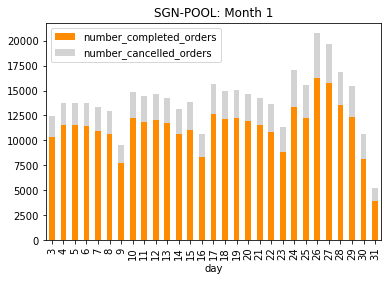

<Figure size 1440x432 with 0 Axes>

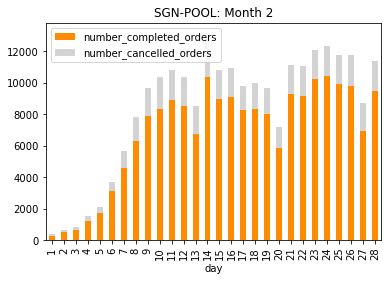

<Figure size 1440x432 with 0 Axes>

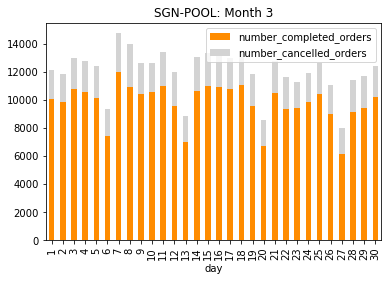

<Figure size 1440x432 with 0 Axes>

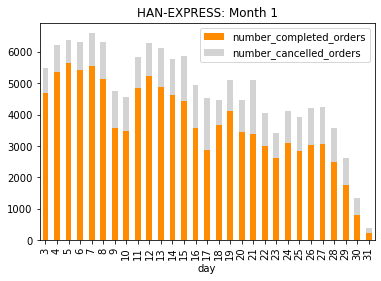

<Figure size 1440x432 with 0 Axes>

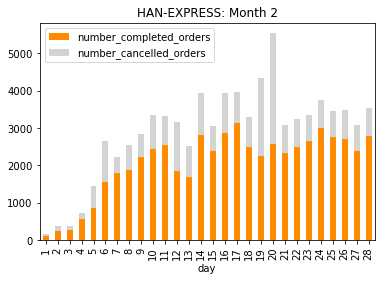

<Figure size 1440x432 with 0 Axes>

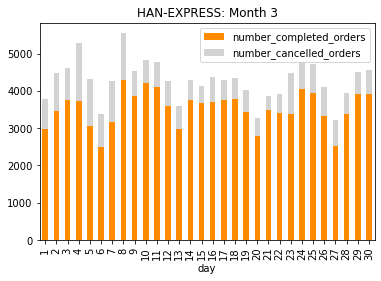

<Figure size 1440x432 with 0 Axes>

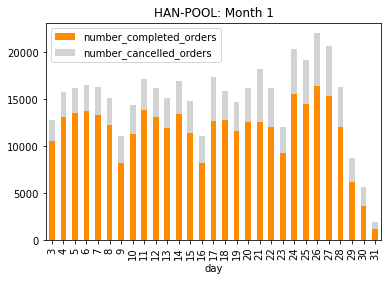

<Figure size 1440x432 with 0 Axes>

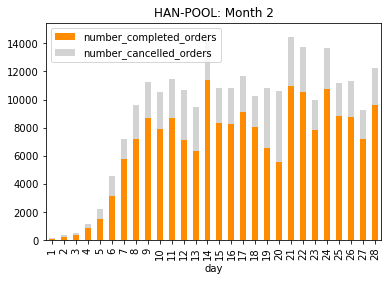

<Figure size 1440x432 with 0 Axes>

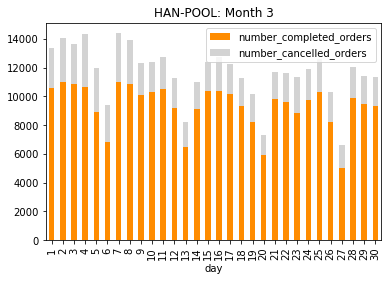

<Figure size 1440x432 with 0 Axes>

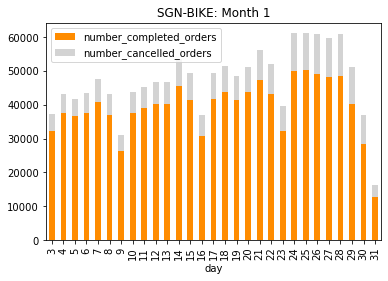

<Figure size 1440x432 with 0 Axes>

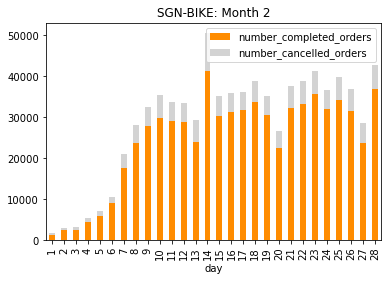

<Figure size 1440x432 with 0 Axes>

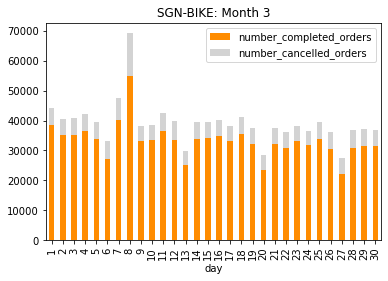

<Figure size 1440x432 with 0 Axes>

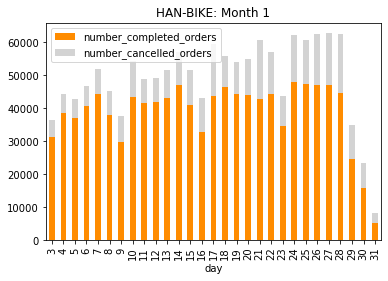

<Figure size 1440x432 with 0 Axes>

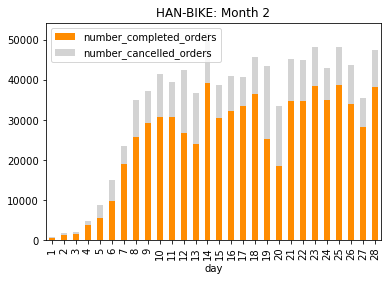

<Figure size 1440x432 with 0 Axes>

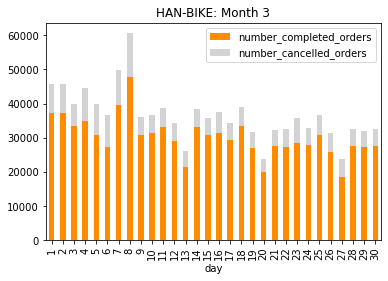

<Figure size 1440x432 with 0 Axes>

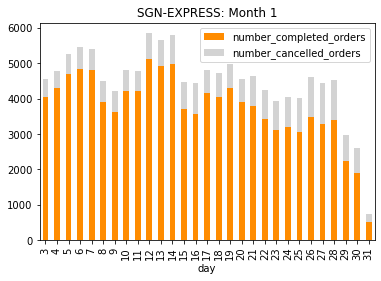

<Figure size 1440x432 with 0 Axes>

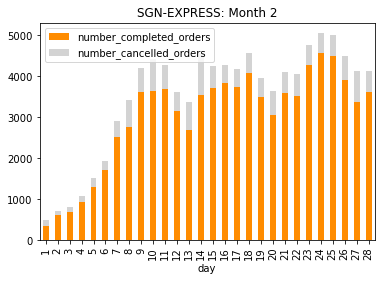

<Figure size 1440x432 with 0 Axes>

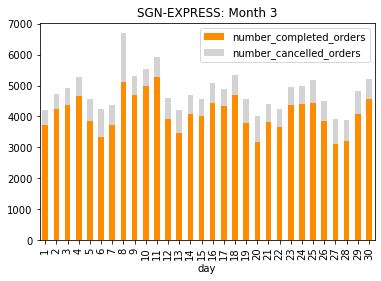

In [453]:
for ser in com_can['service_id'].unique():
    service = com_can[com_can['service_id'] == ser]
    for i in service['month'].unique():
        plt.figure(figsize = (20,6))
        month = service[service['month'] == i]
        month = month[['day', 'number_completed_orders', 'number_cancelled_orders']]
        month.set_index('day', inplace = True)
        month.plot(kind='bar', stacked=True, color=['darkorange', 'lightgrey'])
        plt.title(str(ser) + ": Month " + str(i))
plt.savefig('cau_2.png', transparent = True, dpi = 80, bbox_inches = "tight")

In [ ]:
for ser in final['service_id'].unique():
    service = final[final['service_id'] == ser]
    plt.figure(figsize = (20,5))
    plt.suptitle(ser)
    position = 1
    for i in service['month'].unique():

        plt.subplot(1,3, position)
        month = service[service['month'] == i]
        sns.lineplot(data = month.groupby('day')['number_users'].mean().reset_index(),
                     x = 'day',
                     y = 'number_users',
                     color = 'darkorange')
        plt.twinx()
        sns.lineplot(data = month.groupby('day')['total_number_orders'].mean().reset_index(),
                     x = 'day',
                     y = 'total_number_orders',
                     color = 'grey')
        position += 1
    plt.tight_layout()
plt.tight_layout()
plt.savefig('Name.png', transparent = True, dpi = 80, bbox_inches = "tight")

# Số đơn hàng/ số user ứng với mỗi dịch vụ theo ngày/ tháng (tính toán lại và visualize)

In [398]:
per_service.head()

,year,month,day,service_id,number_users
105,2022,1,3,HAN-BIKE,17119
106,2022,1,3,HAN-POOL,7911
107,2022,1,3,SGN-BIKE,17383
109,2022,1,3,SGN-POOL,7536
117,2022,1,3,HAN-EXPRESS,2394


In [399]:
com_can.head()

,year,month,day,service_id,number_completed_orders,number_cancelled_orders
101,2022,1,3,SGN-POOL,10323,2140
114,2022,1,3,HAN-EXPRESS,4694,792
117,2022,1,3,HAN-POOL,10507,2286
118,2022,1,3,SGN-BIKE,32193,5024
126,2022,1,3,HAN-BIKE,31162,5219


In [405]:
final = pd.merge(per_service, com_can, how = 'inner', on = ['year', 'month', 'day', 'service_id'])
final['total_number_orders'] = final['number_completed_orders'] +final['number_cancelled_orders']
final.drop(columns = ['year', 'number_completed_orders', 'number_cancelled_orders'], inplace = True)
final.head()

In [429]:
final['service_id'].unique()

array(['HAN-BIKE', 'HAN-POOL', 'SGN-BIKE', 'SGN-POOL', 'HAN-EXPRESS',
       'SGN-EXPRESS'], dtype=object)

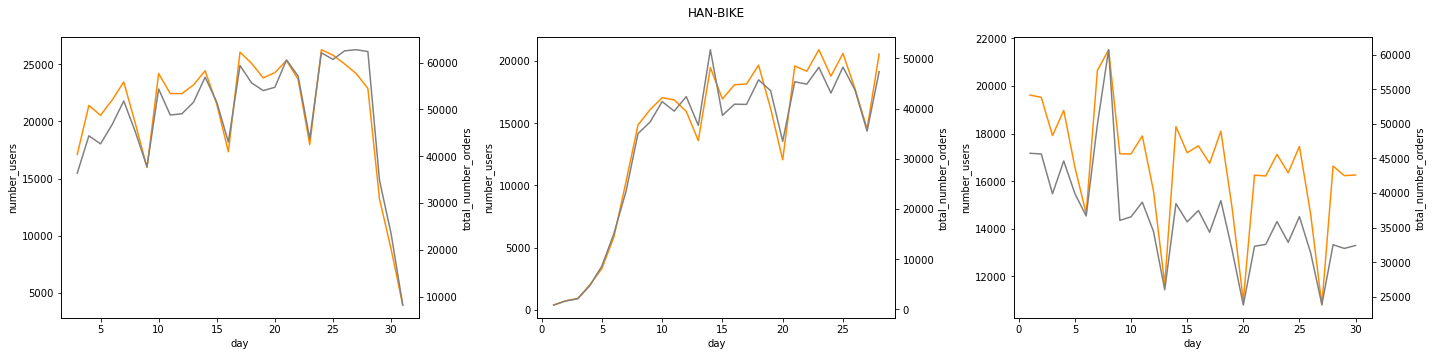

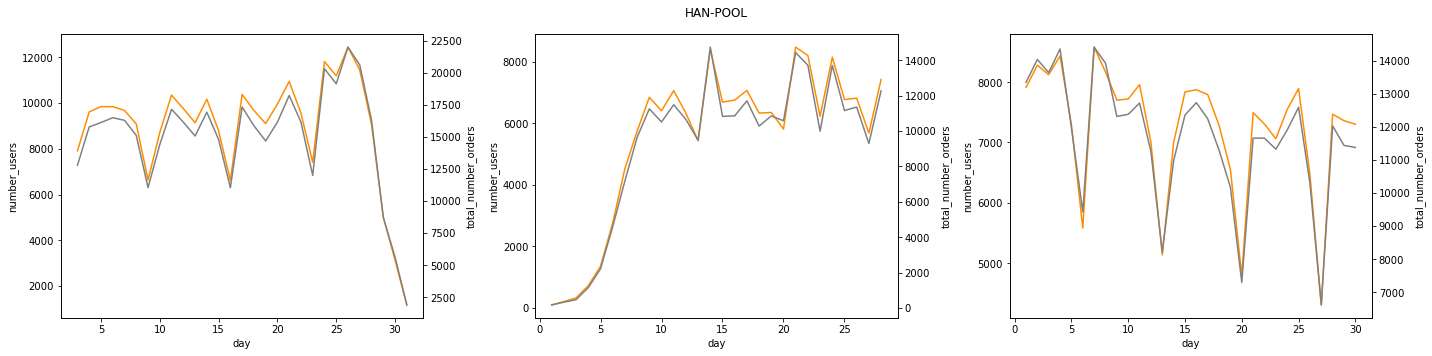

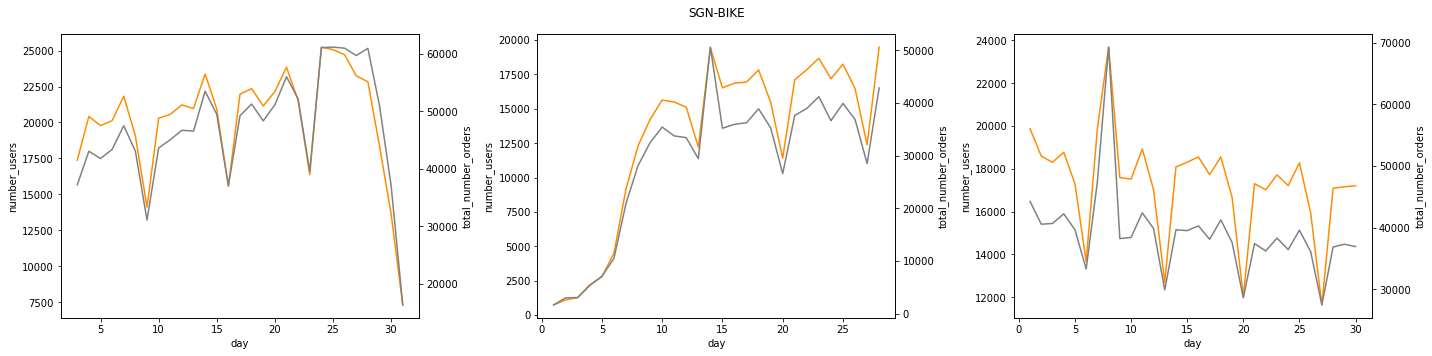

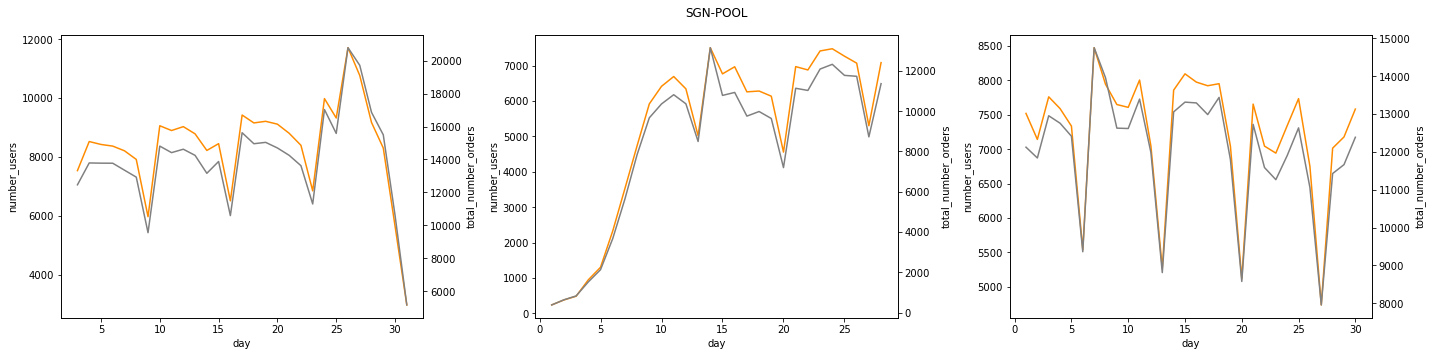

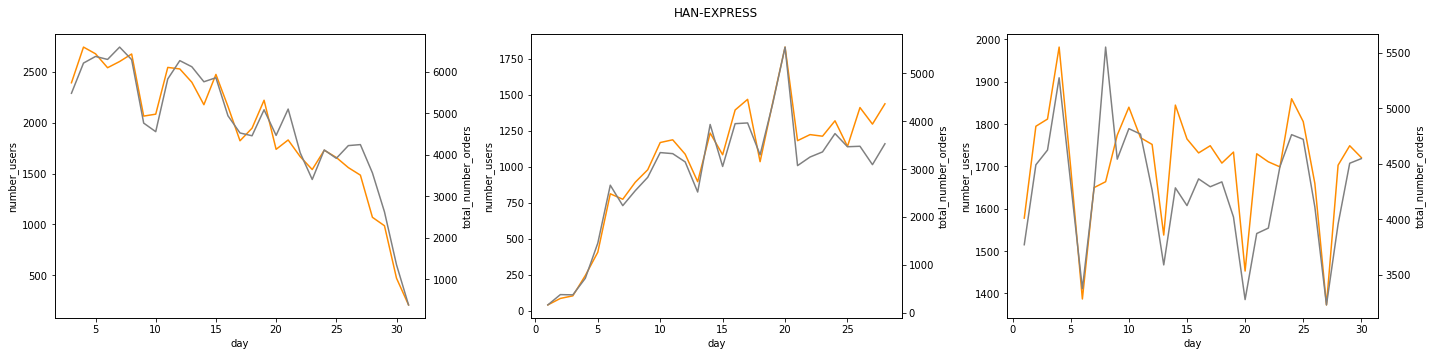

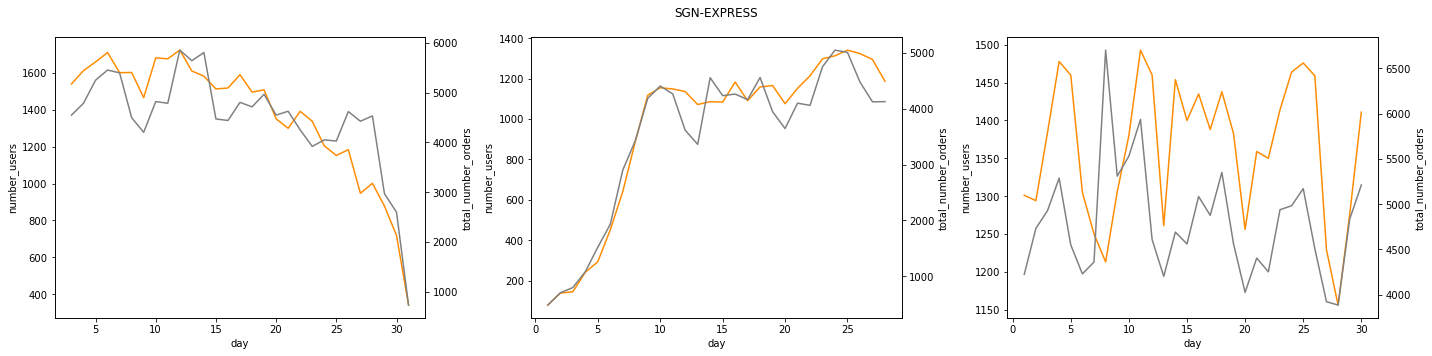

In [442]:
for ser in final['service_id'].unique():
    service = final[final['service_id'] == ser]
    plt.figure(figsize = (20,5))
    plt.suptitle(ser)
    position = 1
    for i in service['month'].unique():

        plt.subplot(1,3, position)
        month = service[service['month'] == i]
        sns.lineplot(data = month.groupby('day')['number_users'].mean().reset_index(),
                     x = 'day',
                     y = 'number_users',
                     color = 'darkorange')
        plt.twinx()
        sns.lineplot(data = month.groupby('day')['total_number_orders'].mean().reset_index(),
                     x = 'day',
                     y = 'total_number_orders',
                     color = 'grey')
        position += 1
    plt.tight_layout()
plt.tight_layout()
plt.savefig('Name.png', transparent = True, dpi = 80, bbox_inches = "tight")